In [1]:
from IPython.display import Markdown
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Markdown("## Intro to Gradients")

## Intro to Gradients

In [2]:
def display_image(image, title=None):
    plt.figure(figsize=(10, 8))
    plt.subplot(111)
    plt.imshow(image, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

In [3]:
sudoku = cv2.imread("../../resources/DATA/sudoku.jpg", 0)
sudoku.shape

(1024, 962)

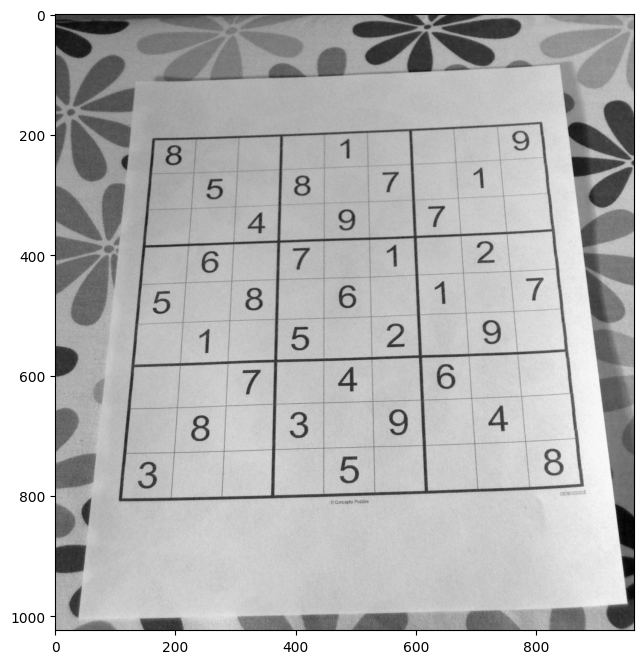

In [4]:
display_image(sudoku)

In [5]:
sobelX = cv2.Sobel(sudoku, cv2.CV_64F, 1, 0, ksize=5)
sobelX.shape

(1024, 962)

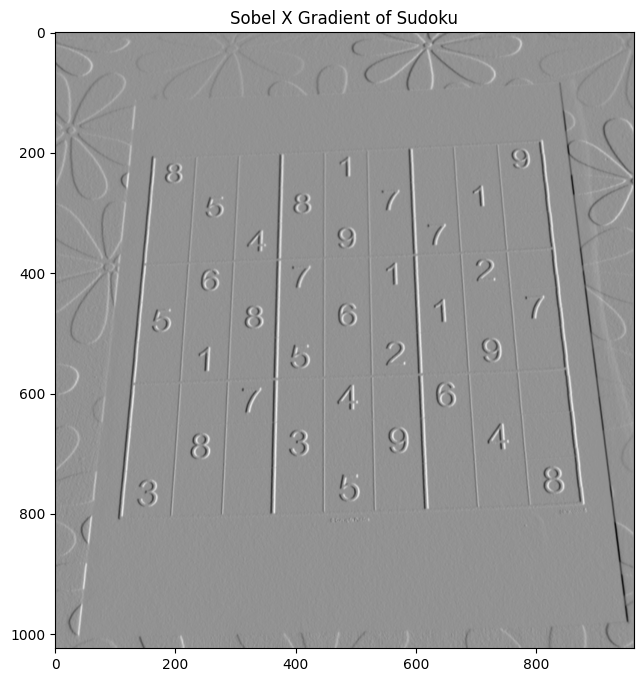

In [6]:
display_image(sobelX, "Sobel X Gradient of Sudoku")

In [7]:
sobelY = cv2.Sobel(sudoku, cv2.CV_64F, 0, 1, ksize=5)
sobelY.shape

(1024, 962)

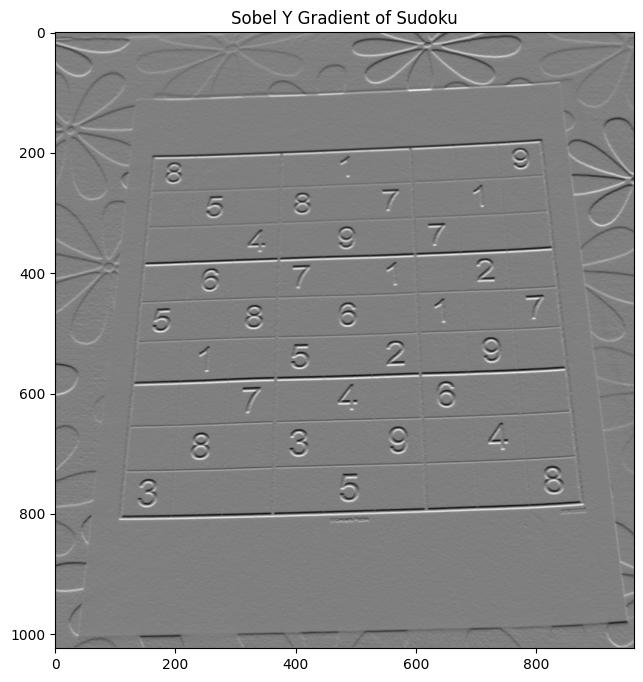

In [8]:
display_image(sobelY, "Sobel Y Gradient of Sudoku")

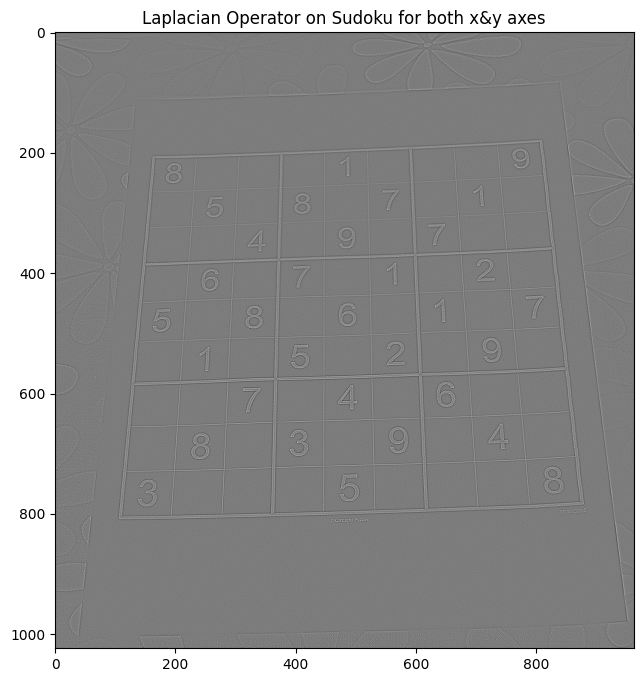

In [10]:
laplacian = cv2.Laplacian(sudoku, cv2.CV_64F)
display_image(laplacian, "Laplacian Operator on Sudoku for both x&y axes")

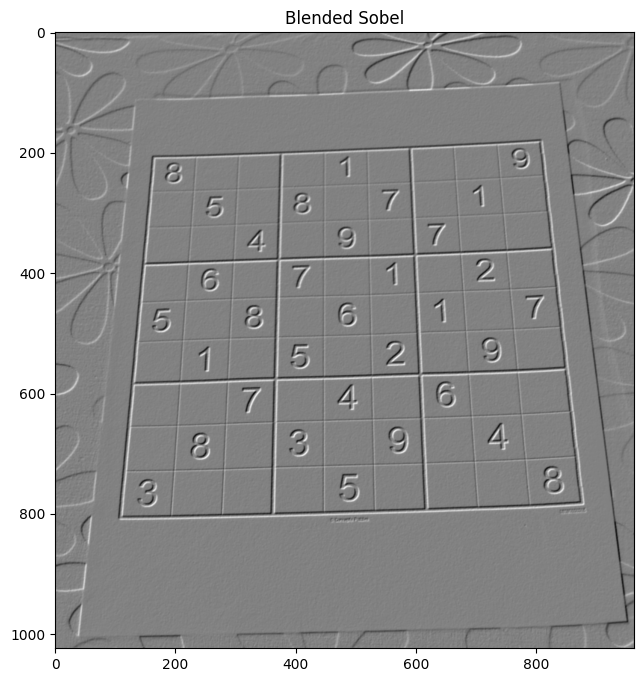

In [11]:
blended_sobel = cv2.addWeighted(src1=sobelX, alpha=0.5, src2=sobelY, beta=0.5, gamma=0)
display_image(blended_sobel, "Blended Sobel")

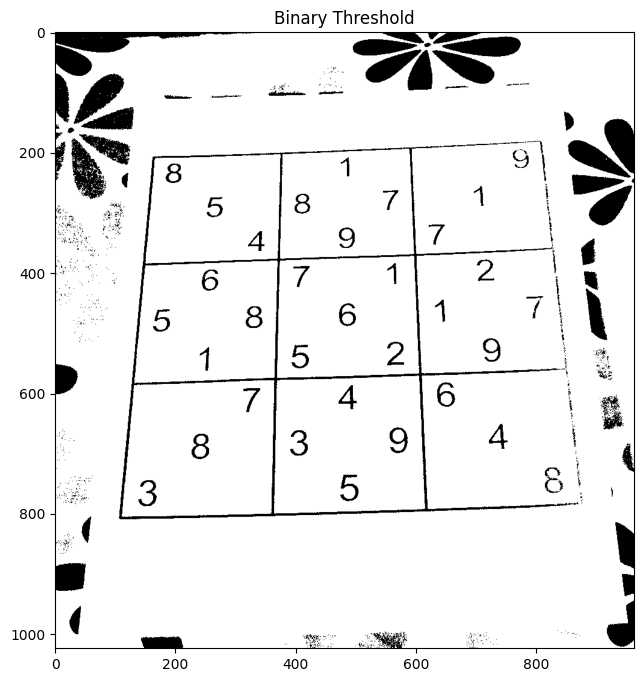

In [12]:
ret, th1 = cv2.threshold(sudoku, 100, 255, cv2.THRESH_BINARY)
display_image(th1, "Binary Threshold")

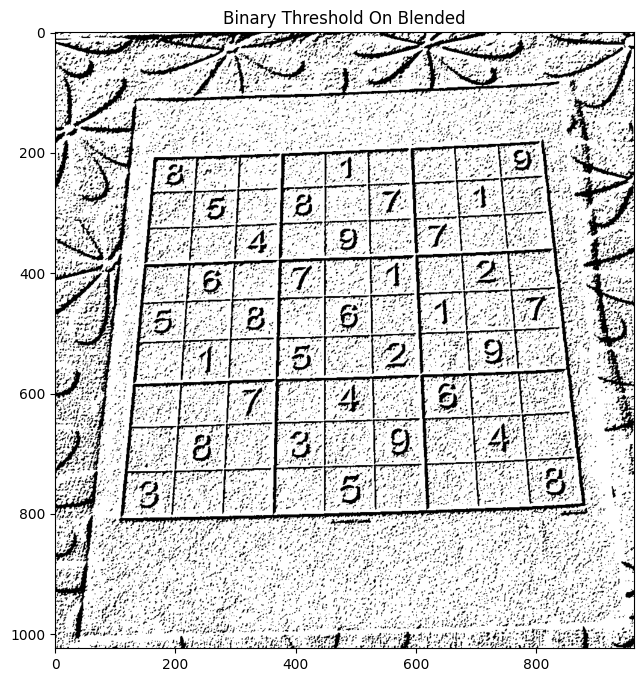

In [14]:
ret, th2 = cv2.threshold(blended_sobel, 100, 255, cv2.THRESH_BINARY_INV)
display_image(th2, "Binary Threshold On Blended")

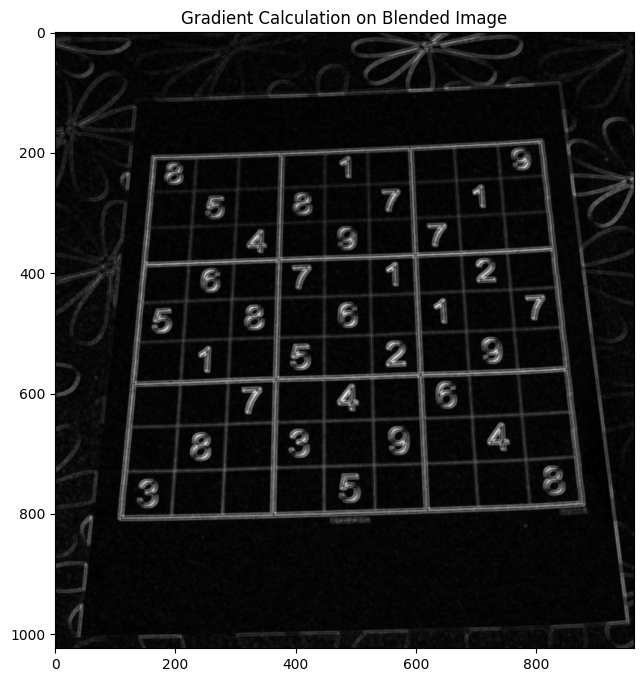

In [15]:
kernel = np.ones((4, 4), dtype=np.uint8)
gradient = cv2.morphologyEx(blended_sobel, cv2.MORPH_GRADIENT, kernel)
display_image(gradient, "Gradient Calculation on Blended Image")